# ARTIFICIAL NEURAL NETWORKS
Welcome to this tutorial. In this section of the course, we will delve deeper into the easy to code, optimized neural networks. 

These libraries are usually research oriented and not used for high scale deployments.

### WHAT IS DEEP LEARNING? 
Deep Learning is the type of Machine Learning that utilizes algorithms that mimic the human brain. The idea of deep learning has been around since the 1940's. Alan Turing's seminal paper "Computer Machinery and Intelligence" explains the idea of a machine thinking for itself. 

So why the sudden interest in Deep Learning? Why is it called the technology of tomorrow if it has been around for half a century? Because in those times, we simply did not have the computation power and the memory to practice the art of deep learning. 


For a solid picture, in the 1980's, a 10 Megabyte hard drive costed 3500USD!!

### THE NEURON 
The following graphic shows a simplified neuron structure for our deep learning models. 

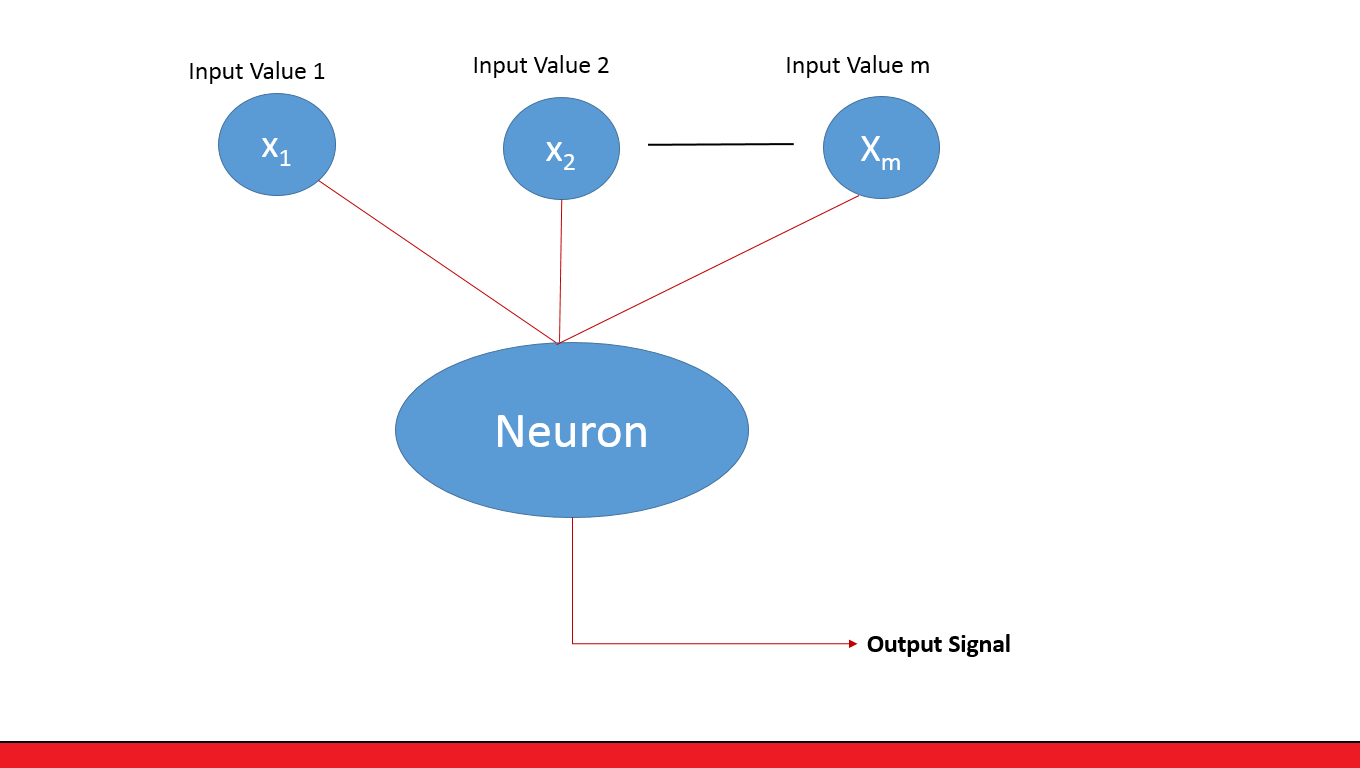


We have the following layers in a neuron:
1. Input Layer
    - Input should be normalized.
2. Hidden Layer(s)
    - The core of Deep Learning.
3. Output layer

The input layer mimics a dendrite, that brings information into the neuron body. 

The output layer mimics an axon, that takes information out of the neuron body. 

The hidden layer mimics the neuron body.

### STEP 1: INSTALLING THE LIBRARIES

In [19]:
# Installing Theano
# pip install --upgrade git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras


### STEP 2: IMPORTING THE LIBRARIES + DATASET

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
#IMPORT THE DATASET
dataset = pd.read_csv('../Datasets/diabetes.csv')
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values
# SPLIT THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
# NORMALIZING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### STEP 3: CREATING THE ANN

So let's revise how a neural network works. 

1. Randomly Initializing weights and bias of inputs in the input layer. 
2. Forward Propagation. Calculating the net activation by the sum of inputs x weights and forwarding in the hidden layer. 
3. Applying the activation function to the net activation in the hidden layer.
4. Shooting the activation function output to the output neuron. 
5. Comparing the output value with the real value and calculating a cost. (Choice of cosr function varies)
6. Backpropagate that cost to the neural network and update the weights and bias by gradient descent.
    - the derivative of cost function with respect to the weights and bias. 
    - New weights and bias calculations by 
        - w_new = w_old - lr * dcost/dw


In [21]:
# Initialize the ANN object
classifier = Sequential() 
# Creating the first hidden layer with inputs
# Units = 8+1/2 = 4.5 = 5
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = np.shape(X)[1]))
# Creating the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
# Creating the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting on the training set
classifier.fit(X_train, y_train, batch_size = 5, epochs = 200)


Epoch 1/200
652/652 [==============================] - 0s 595us/step - loss: 0.6847 - acc: 0.6518
Epoch 2/200
652/652 [==============================] - 0s 216us/step - loss: 0.6303 - acc: 0.6595
Epoch 3/200
652/652 [==============================] - 0s 237us/step - loss: 0.5488 - acc: 0.6595
Epoch 4/200
652/652 [==============================] - 0s 239us/step - loss: 0.5226 - acc: 0.6595
Epoch 5/200
652/652 [==============================] - 0s 219us/step - loss: 0.5138 - acc: 0.6595
Epoch 6/200
652/652 [==============================] - 0s 254us/step - loss: 0.5088 - acc: 0.6595
Epoch 7/200
652/652 [==============================] - 0s 239us/step - loss: 0.5045 - acc: 0.7055
Epoch 8/200
652/652 [==============================] - 0s 226us/step - loss: 0.5016 - acc: 0.7776
Epoch 9/200
652/652 [==============================] - 0s 228us/step - loss: 0.4986 - acc: 0.7791
Epoch 10/200
652/652 [==============================] - 0s 222us/step - loss: 0.4965 - acc: 0.7730
Epoch 11/200
652/65

652/652 [==============================] - 0s 341us/step - loss: 0.4296 - acc: 0.8052
Epoch 165/200
652/652 [==============================] - 0s 260us/step - loss: 0.4309 - acc: 0.8113
Epoch 166/200
652/652 [==============================] - 0s 301us/step - loss: 0.4300 - acc: 0.8083
Epoch 167/200
652/652 [==============================] - 0s 262us/step - loss: 0.4295 - acc: 0.8052
Epoch 168/200
652/652 [==============================] - 0s 295us/step - loss: 0.4293 - acc: 0.8083
Epoch 169/200
652/652 [==============================] - 0s 210us/step - loss: 0.4298 - acc: 0.8052
Epoch 170/200
652/652 [==============================] - 0s 205us/step - loss: 0.4294 - acc: 0.8067
Epoch 171/200
652/652 [==============================] - 0s 196us/step - loss: 0.4303 - acc: 0.8067
Epoch 172/200
652/652 [==============================] - 0s 213us/step - loss: 0.4297 - acc: 0.7991
Epoch 173/200
652/652 [==============================] - 0s 202us/step - loss: 0.4295 - acc: 0.8083
Epoch 174/200


### STEP 4: PREDICTING ON THE TEST SET

In [22]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# The last line of code is used due to the sigmoid activation in the last layer
# Using the step function will free us from this issue.


### STEP 5: EVALUATING THE PERFORMANCE

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.84      0.87      0.85        70
          1       0.79      0.74      0.76        46

avg / total       0.82      0.82      0.82       116



### WELCOME TO THE END OF THE TUTORIAL

Hope you enjoyed this tutorial just as much as I enjoyed coding it. 

---------------------------------------------------------------------------------------
Copyrights © 2018, All Rights Reserved.
- Author: Mahnoor Anjum.
- Course: The Complete Hands-On Machine Learning Course
- Date Created: 2018-07-18
- Date Modified: -